**Analyse and visualise data**

In [14]:
# packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from joblib import dump, load
from scipy.stats import zscore, randint

In [15]:
# load data and custom classes
%run load_data.ipynb
%run interpolation_imputer.ipynb
%run outlier_zscore.ipynb
%run log_transformer.ipynb

In [16]:
# load model
stacking_boost = load('air_pollution_model.joblib')

In [17]:
y_test_predicted = stacking_boost.predict(test_X)

In [18]:
# this can be done for train/test data
analyse_results_df = pd.DataFrame({
    'Date': train_X['Date'],
    'Place_ID': train_X['Place_ID'],    
    'target': train_y  
})

Text(0, 0.5, 'Average Pollution Level')

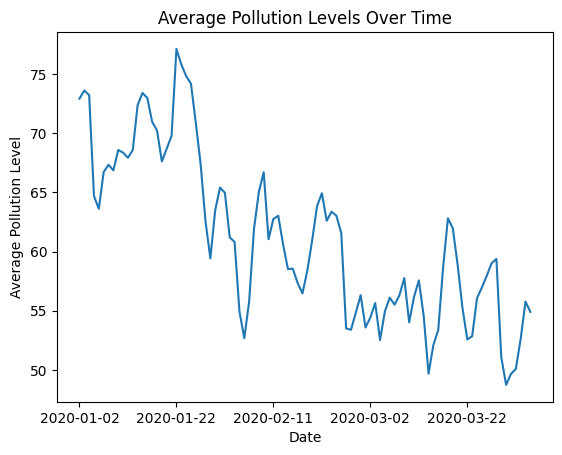

In [20]:
# trend over time
avg_pollution_by_date = analyse_results_df.groupby('Date')['target'].mean()

avg_pollution_by_date.plot(kind='line', title='Average Pollution Levels Over Time')
plt.xlabel('Date')
plt.ylabel('Average Pollution Level')

Air_Quality_Category
Unhealthy                   147
Moderate                    101
Unhealthy for Sensitives     82
Very Unhealthy                8
Good                          2
Hazardous                     0
Name: count, dtype: int64


Text(0, 0.5, 'Count')

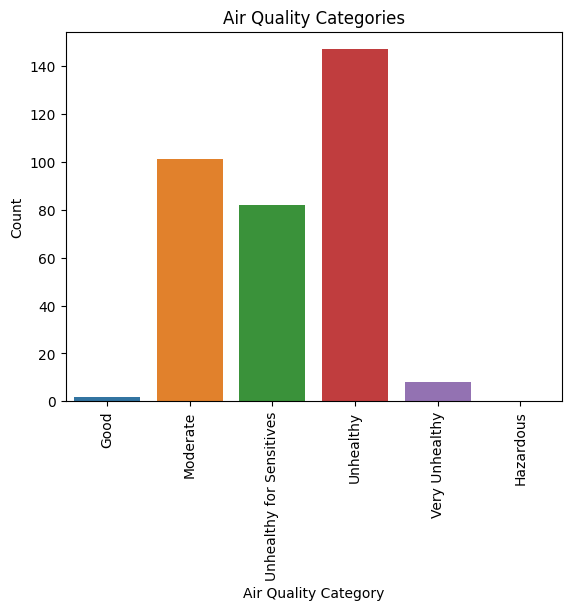

In [21]:
# Plot sum of Place_IDs per USA AQI Level 
average_category = analyse_results_df.groupby('Place_ID').mean('target').sort_values('target', ascending=False)

average_category['Air_Quality_Category'] = pd.cut(
    average_category['target'],
    bins=[-np.inf, 12, 35.4, 55.4, 150.4, 250.4, np.inf],
    labels=['Good', 'Moderate', 'Unhealthy for Sensitives', 'Unhealthy', 'Very Unhealthy', 'Hazardous']
)

print(average_category['Air_Quality_Category'].value_counts())

sns.countplot(x='Air_Quality_Category', data=average_category)
plt.title('Air Quality Categories')
plt.xticks(rotation='vertical')
plt.xlabel('Air Quality Category')
plt.ylabel('Count')